<a href="https://www.kaggle.com/code/renasyanandafafirly/uas-statistika?scriptVersionId=155702452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

UAS STATISTIKA INFORMASI : RENASYA NANDA (V3922039) ZULFA AULIA (V3922049)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-states-education-statistics/number-of-teachers.csv
/kaggle/input/indian-states-education-statistics/library-facility.csv
/kaggle/input/indian-states-education-statistics/electricity-availability.csv
/kaggle/input/indian-states-education-statistics/scheduled-tribes-population.csv
/kaggle/input/indian-states-education-statistics/ramp-for-special-needs-students.csv
/kaggle/input/indian-states-education-statistics/availability-of-girls-toilet.csv
/kaggle/input/indian-states-education-statistics/student-enrollment.csv
/kaggle/input/indian-states-education-statistics/medical-checkup.csv
/kaggle/input/indian-states-education-statistics/drinking-water-availability.csv
/kaggle/input/indian-states-education-statistics/scheduled-caste-population.csv
/kaggle/input/indian-states-education-statistics/computer-availability.csv
/kaggle/input/indian-states-education-statistics/availability-of-boys-toilet.csv
/kaggle/input/indian-states-education-statistics/internet-facility.csv
/ka

In [2]:
# ## STUDI KASUS 1 : KOMPARASI
# Menggunakan data computer-availability.csv
# 
# Berdasarkan data computer-availability.csv 
#Studi kasus ini bertujuan untuk melakukan komparasi ketersediaan fasilitas komputer di sekolah-sekolah di India berdasarkan jenis manajemen, 
#yakni sekolah pemerintah (Govt.), pemerintah dibantu (Govt. Aided), dan swasta (Pvt. Unaided). 
#Menggunakan dataset "computer-availability.csv", analisis dimulai dengan tahap pembersihan dan preprocessing data untuk memastikan keakuratan hasil. 
#Selanjutnya, eksplorasi data dilakukan melalui visualisasi seperti scatter plot dan bar plot untuk mengidentifikasi perbedaan 
#dalam ketersediaan fasilitas komputer di antara kategori sekolah. 
#Analisis ini diharapkan dapat memberikan wawasan mengenai perbandingan ketersediaan fasilitas komputer di berbagai jenis sekolah dan menghasilkan temuan 
#yang dapat digunakan untuk merumuskan rekomendasi kebijakan pendidikan yang relevan.

In [3]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Langkah 2 : Memilih data yang akan digunakan
data = pd.read_csv(r"/kaggle/input/indian-states-education-statistics/computer-availability.csv")

In [5]:
#  Langkah 3 : Print kolom yang ada dalam data
print("Nama Kolom:")
print(data.columns)

Nama Kolom:
Index(['State', 'Total Schools - All Management', 'Total Schools - Govt.',
       'Total Schools - Govt. Aided', 'Total Schools - Pvt. Unaided',
       'Total Schools - Others',
       'Schools with Computer Facility - All Management',
       'Schools with Computer Facility - Govt.',
       'Schools with Computer Facility - Govt. Aided',
       'Schools with Computer Facility - Pvt. Unaided',
       'Schools with Computer Facility - Others',
       '% of Schools with Computer Facility - All Management',
       '% of Schools with Computer Facility - Govt.',
       '% of Schools with Computer Facility - Govt. Aided',
       '% of Schools with Computer Facility - Pvt. Unaided',
       '% of Schools with Computer Facility - Others'],
      dtype='object')


In [6]:
# Langkah 4 : Print beberapa data
print("\nBeberapa Data:")
print(data.head(5))


Beberapa Data:
                         State  Total Schools - All Management  \
0  Andaman and Nicobar Islands                             417   
1               Andhra Pradesh                           63343   
2            Arunachal Pradesh                            3675   
3                        Assam                           65203   
4                        Bihar                           93459   

   Total Schools - Govt.  Total Schools - Govt. Aided  \
0                    342                            2   
1                  45145                         2121   
2                   3061                           67   
3                  46749                         4983   
4                  75555                          735   

   Total Schools - Pvt. Unaided  Total Schools - Others  \
0                            73                       0   
1                         15792                     285   
2                           496                      51   
3       

In [7]:
# Langkah 6 : Print deskripsi dari setiap kolom
print(data.describe())

       Total Schools - All Management  Total Schools - Govt.  \
count                       36.000000              36.000000   
mean                     41920.444444           28668.027778   
std                      52769.522445           33357.152763   
min                         45.000000              45.000000   
25%                       3436.000000            2412.250000   
50%                      23466.500000           16021.000000   
75%                      63553.500000           47216.500000   
max                     256911.000000          137068.000000   

       Total Schools - Govt. Aided  Total Schools - Pvt. Unaided  \
count                    36.000000                     36.000000   
mean                   2341.527778                   9465.361111   
std                    4569.659303                  17304.536652   
min                       0.000000                      0.000000   
25%                      18.500000                    470.250000   
50%            

In [8]:
# Langkah 7 : Melakukan clening data dan Cetak hasil clening data
df_cleaned = data.dropna()

In [9]:
print(df_cleaned.describe())

       Total Schools - All Management  Total Schools - Govt.  \
count                       36.000000              36.000000   
mean                     41920.444444           28668.027778   
std                      52769.522445           33357.152763   
min                         45.000000              45.000000   
25%                       3436.000000            2412.250000   
50%                      23466.500000           16021.000000   
75%                      63553.500000           47216.500000   
max                     256911.000000          137068.000000   

       Total Schools - Govt. Aided  Total Schools - Pvt. Unaided  \
count                    36.000000                     36.000000   
mean                   2341.527778                   9465.361111   
std                    4569.659303                  17304.536652   
min                       0.000000                      0.000000   
25%                      18.500000                    470.250000   
50%            

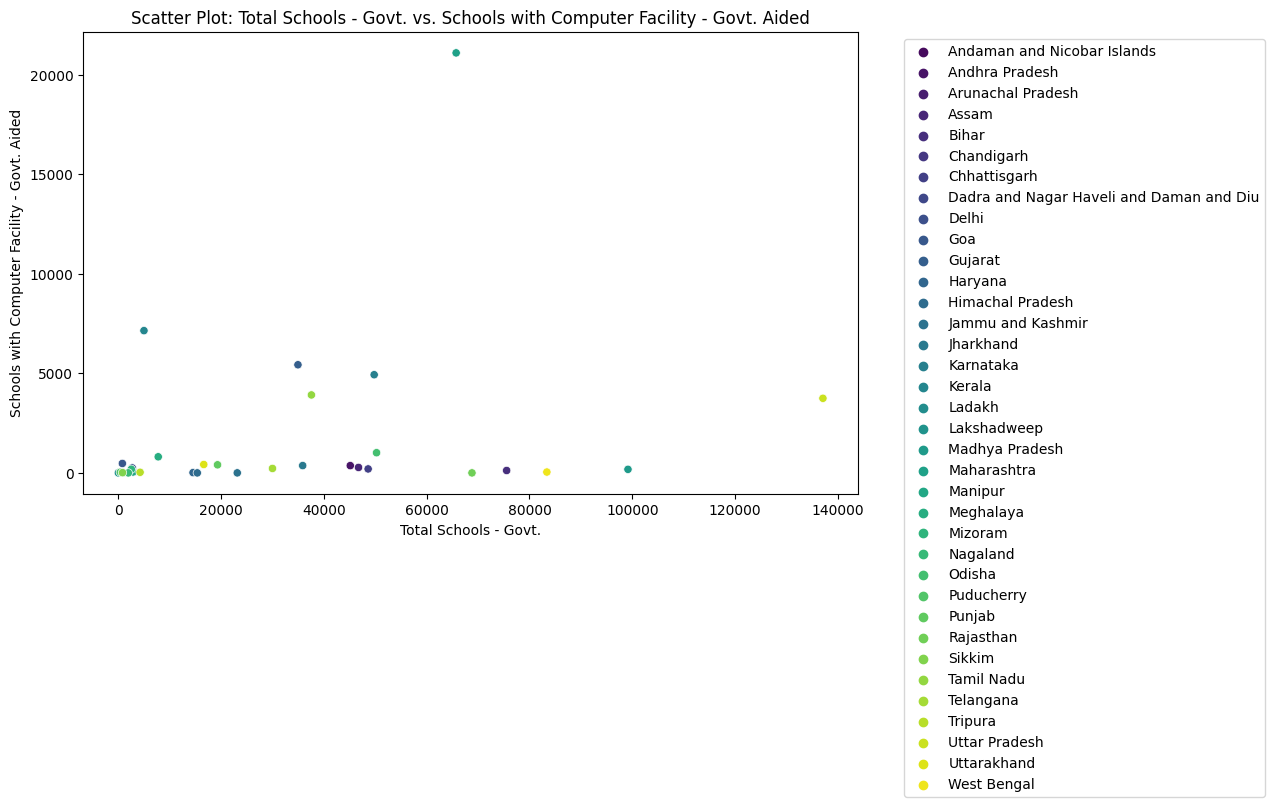

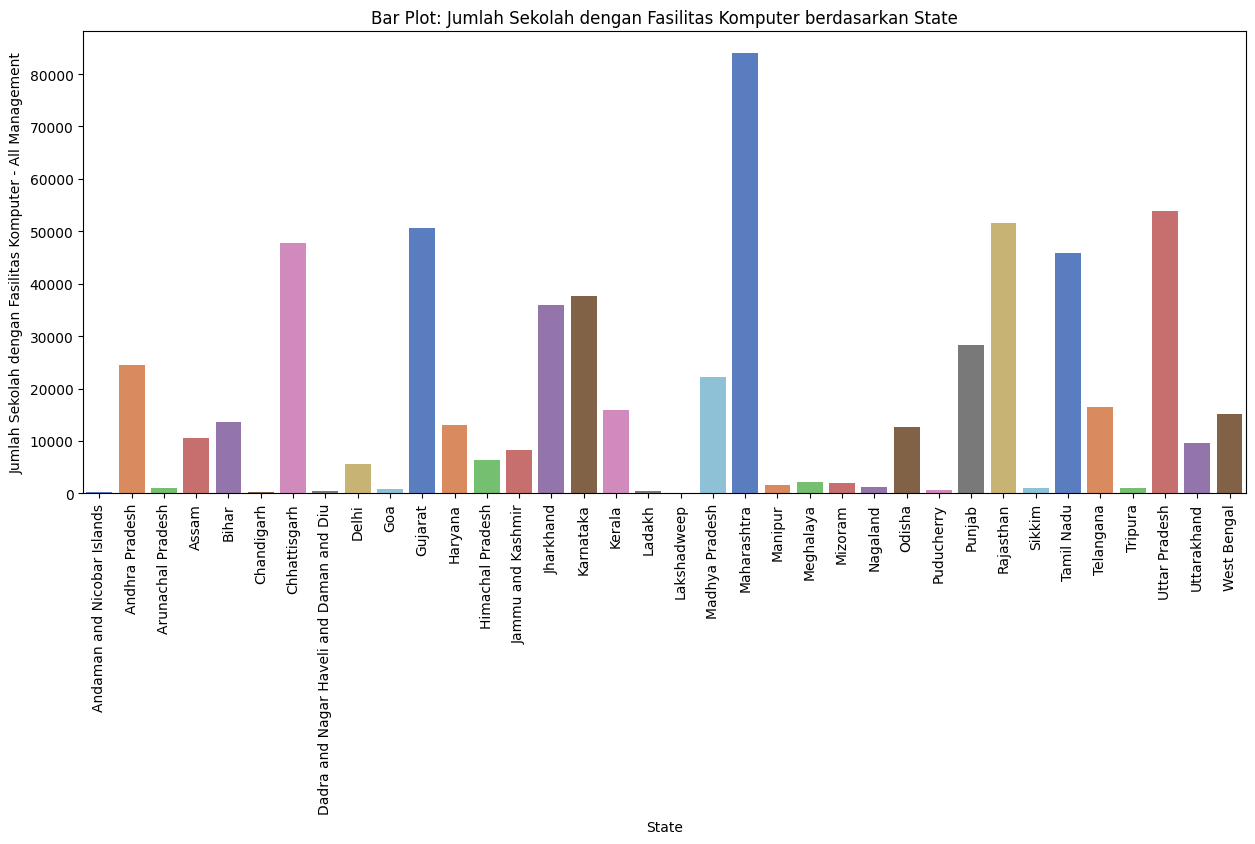

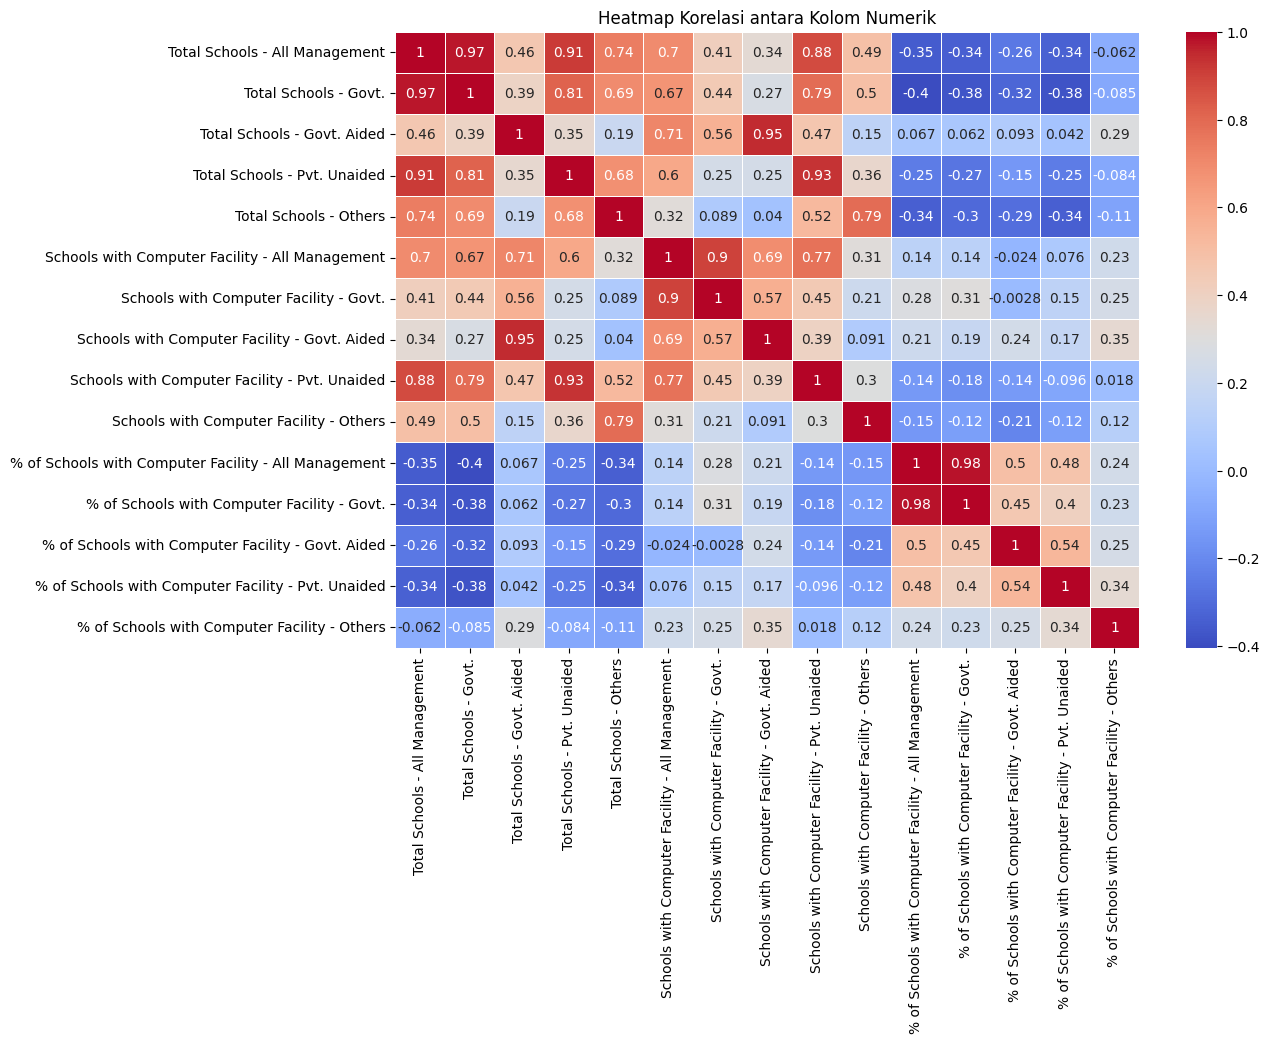

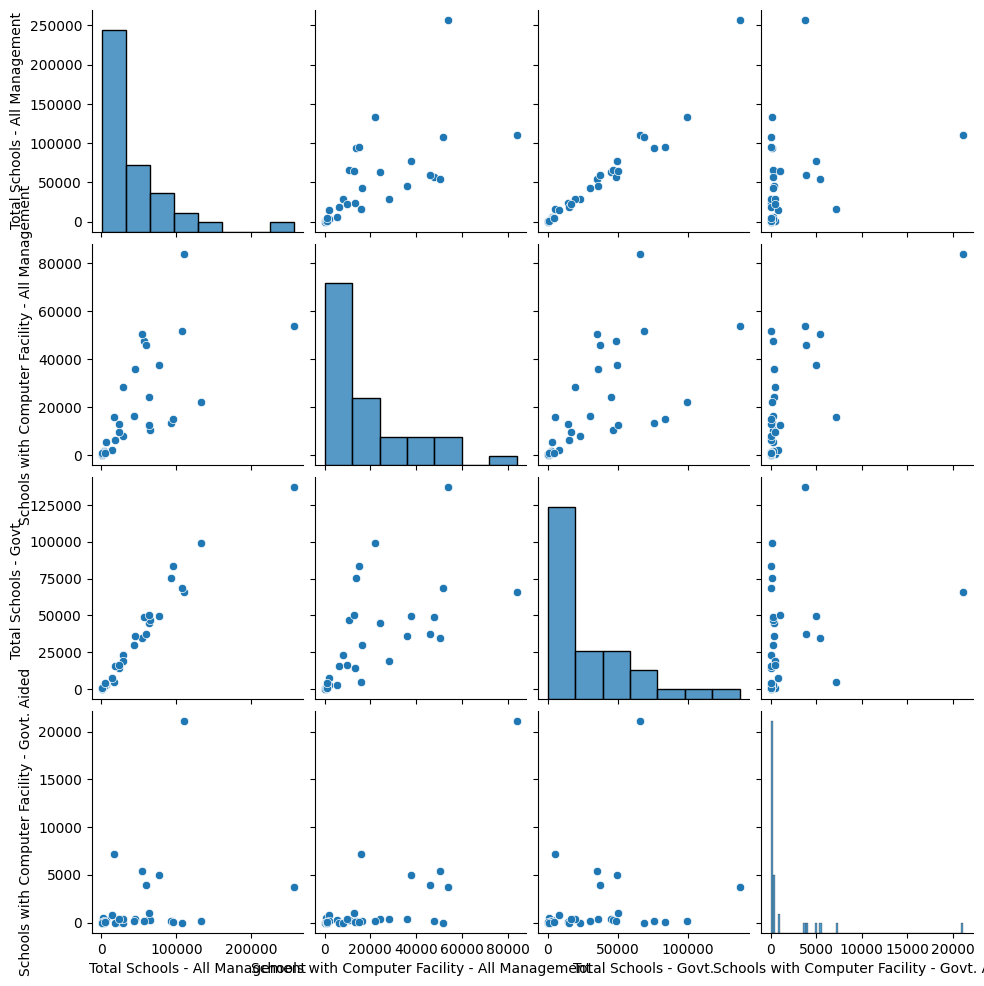

In [10]:
# Langkah 8: Analisis Menggunakan Visualisasi
# seperti scatter plot, bar plot, heatmap korelasi, dan pair plot.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ubah path sesuai dengan lokasi file CSV pada perangkat Anda
file_path = "C:/Users/user/Downloads/student india/computer-avaibility.csv"

# Load data dari file CSV
data = pd.read_csv("/kaggle/input/indian-states-education-statistics/computer-availability.csv")

# Drop kolom 'State' untuk membuat matriks korelasi
data_numeric = data.drop('State', axis=1)

# Scatter plot antara Total Schools - Govt. dan Schools with Computer Facility - Govt. Aided
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Schools - Govt.', y='Schools with Computer Facility - Govt. Aided', data=data, hue='State', palette='viridis')
plt.title('Scatter Plot: Total Schools - Govt. vs. Schools with Computer Facility - Govt. Aided')
plt.xlabel('Total Schools - Govt.')
plt.ylabel('Schools with Computer Facility - Govt. Aided')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Bar plot untuk menunjukkan jumlah sekolah dengan fasilitas komputer berdasarkan state
plt.figure(figsize=(15, 6))
sns.barplot(x='State', y='Schools with Computer Facility - All Management', data=data, palette='muted')
plt.title('Bar Plot: Jumlah Sekolah dengan Fasilitas Komputer berdasarkan State')
plt.xlabel('State')
plt.ylabel('Jumlah Sekolah dengan Fasilitas Komputer - All Management')
plt.xticks(rotation=90)
plt.show()

# Heatmap korelasi antara kolom-kolom numerik
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi antara Kolom Numerik')
plt.show()

# Pair plot untuk melihat hubungan antara beberapa kolom numerik
sns.pairplot(data[['Total Schools - All Management', 'Schools with Computer Facility - All Management', 'Total Schools - Govt.', 'Schools with Computer Facility - Govt. Aided']])
plt.show()


In [11]:
#STUDI KASUS 2 : #KLASIFIKASI



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Baca dataset
data = pd.read_csv("/kaggle/input/indian-states-education-statistics/computer-availability.csv")

# Menampilkan nama kolom dalam dataset
print(data.columns)

# Memilih fitur-fitur untuk klasifikasi
features = ['Total Schools - Govt.', 'Schools with Computer Facility - Govt.']

# Menentukan target
target = 'Total Schools - Pvt. Unaided'

# Memilih subset data untuk analisis
subset_data = data[features + [target]]

# Menampilkan beberapa baris pertama dari subset data
print(subset_data.head())

# Pisahkan data menjadi set pelatihan (80%) dan pengujian (20%)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tampilkan jumlah baris untuk set pelatihan dan pengujian
print("Jumlah baris set pelatihan:", len(train_data))
print("Jumlah baris set pengujian:", len(test_data))

# Pisahkan variabel prediktor (X) dan variabel target (y) untuk set pelatihan
X_train = train_data[features]
y_train = train_data[target]

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model menggunakan data pelatihan
model.fit(X_train, y_train)

# Pisahkan variabel prediktor (X) untuk set pengujian
X_test = test_data[features]

# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Tampilkan beberapa baris pertama dari hasil prediksi
print("Hasil Prediksi:")
print(y_pred[:5])


Index(['State', 'Total Schools - All Management', 'Total Schools - Govt.',
       'Total Schools - Govt. Aided', 'Total Schools - Pvt. Unaided',
       'Total Schools - Others',
       'Schools with Computer Facility - All Management',
       'Schools with Computer Facility - Govt.',
       'Schools with Computer Facility - Govt. Aided',
       'Schools with Computer Facility - Pvt. Unaided',
       'Schools with Computer Facility - Others',
       '% of Schools with Computer Facility - All Management',
       '% of Schools with Computer Facility - Govt.',
       '% of Schools with Computer Facility - Govt. Aided',
       '% of Schools with Computer Facility - Pvt. Unaided',
       '% of Schools with Computer Facility - Others'],
      dtype='object')
   Total Schools - Govt.  Schools with Computer Facility - Govt.  \
0                    342                                     195   
1                  45145                                   10766   
2                   3061          

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.metrics import silhouette_score
from tabulate import tabulate

# Baca dataset
data = pd.read_csv("/kaggle/input/indian-states-education-statistics/computer-availability.csv")

# Menampilkan nama kolom dalam dataset
print(data.columns)

# Memilih fitur-fitur untuk klasifikasi
features = ['Total Schools - Govt.', 'Schools with Computer Facility - Govt.']

# Menentukan target
target = 'Total Schools - Pvt. Unaided'

# Memilih subset data untuk analisis
subset_data = data[features + [target]]

# Menampilkan beberapa baris pertama dari subset data
print(subset_data.head())

# Analisis Klasterisasi menggunakan DBSCAN dan OPTICS
# Selecting features for clustering
cluster_features = [
    'Total Schools - Govt.', 
    'Schools with Computer Facility - Govt.'
]

X_cluster = data[cluster_features]
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)

# DBSCAN
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_cluster.fit_predict(X_cluster_scaled)

# OPTICS
optics_cluster = OPTICS()
optics_labels = optics_cluster.fit_predict(X_cluster_scaled)

# Mengasumsikan 'dbscan_labels' dan 'optics_labels' adalah hasil klasterisasi DBSCAN dan OPTICS
data['DBSCAN_Cluster'] = dbscan_labels
data['OPTICS_Cluster'] = optics_labels

# Tabel Klasterisasi Negara Bagian di India berdasarkan fasilitas sekolah (DBSCAN)
table_dbscan = data.groupby('DBSCAN_Cluster').agg({
    'State': lambda x: ', '.join(x),  # Menggabungkan unique values menjadi string
    'Total Schools - Pvt. Unaided': 'count',
}).reset_index()

table_dbscan.columns = ['DBSCAN_Cluster', 'States', 'Jumlah_Negara_Bagian']
print("\nTabel Klasterisasi DBSCAN:")
print(tabulate(table_dbscan, headers='keys', tablefmt='fancy_grid'))

# Tabel Klasterisasi Negara Bagian di India berdasarkan fasilitas sekolah (OPTICS)
table_optics = data.groupby('OPTICS_Cluster').agg({
    'State': lambda x: ', '.join(x),  # Menggabungkan unique values menjadi string
    'Total Schools - Pvt. Unaided': 'count',
}).reset_index()

table_optics.columns = ['OPTICS_Cluster', 'States', 'Jumlah_Negara_Bagian']
print("\nTabel Klasterisasi OPTICS:")
print(tabulate(table_optics, headers='keys', tablefmt='fancy_grid'))


Index(['State', 'Total Schools - All Management', 'Total Schools - Govt.',
       'Total Schools - Govt. Aided', 'Total Schools - Pvt. Unaided',
       'Total Schools - Others',
       'Schools with Computer Facility - All Management',
       'Schools with Computer Facility - Govt.',
       'Schools with Computer Facility - Govt. Aided',
       'Schools with Computer Facility - Pvt. Unaided',
       'Schools with Computer Facility - Others',
       '% of Schools with Computer Facility - All Management',
       '% of Schools with Computer Facility - Govt.',
       '% of Schools with Computer Facility - Govt. Aided',
       '% of Schools with Computer Facility - Pvt. Unaided',
       '% of Schools with Computer Facility - Others'],
      dtype='object')
   Total Schools - Govt.  Schools with Computer Facility - Govt.  \
0                    342                                     195   
1                  45145                                   10766   
2                   3061          

In [14]:
# Langkah 3 : Melakukan clening columns
print(df_cleaned.columns)

Index(['State', 'Total Schools - All Management', 'Total Schools - Govt.',
       'Total Schools - Govt. Aided', 'Total Schools - Pvt. Unaided',
       'Total Schools - Others',
       'Schools with Computer Facility - All Management',
       'Schools with Computer Facility - Govt.',
       'Schools with Computer Facility - Govt. Aided',
       'Schools with Computer Facility - Pvt. Unaided',
       'Schools with Computer Facility - Others',
       '% of Schools with Computer Facility - All Management',
       '% of Schools with Computer Facility - Govt.',
       '% of Schools with Computer Facility - Govt. Aided',
       '% of Schools with Computer Facility - Pvt. Unaided',
       '% of Schools with Computer Facility - Others'],
      dtype='object')


In [15]:
# Langkah 4 :  Pemodelan regresi
# Menggunakan dua algoritma yang berbeda, yaitu Regresi Linear dan Random Forest Regressor. 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

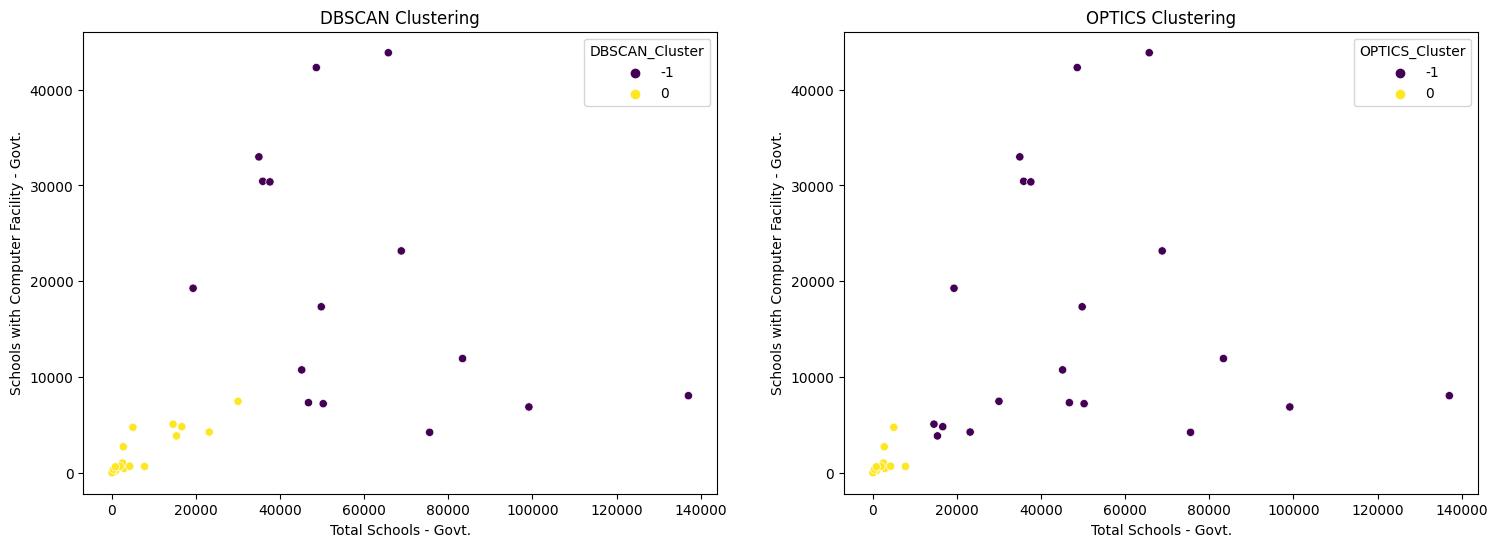

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size
plt.figure(figsize=(18, 6))

# Subplot 1: Scatter plot for DBSCAN clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x='Total Schools - Govt.', y='Schools with Computer Facility - Govt.', hue='DBSCAN_Cluster', data=data, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')

# Subplot 2: Scatter plot for OPTICS clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x='Total Schools - Govt.', y='Schools with Computer Facility - Govt.', hue='OPTICS_Cluster', data=data, palette='viridis', legend='full')
plt.title('OPTICS Clustering')

# Show the plots
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Baca dataset
data = pd.read_csv("/kaggle/input/indian-states-education-statistics/computer-availability.csv")

# Menampilkan nama kolom dalam dataset
print(data.columns)

# Memilih fitur-fitur untuk pemodelan
features = ['Total Schools - Govt.', 'Schools with Computer Facility - Govt.']

# Menentukan target
target = 'Total Schools - Pvt. Unaided'

# Memilih subset data untuk pemodelan
model_data = data[features + [target]]

# Pisahkan data menjadi set pelatihan (80%) dan pengujian (20%)
train_data, test_data = train_test_split(model_data, test_size=0.2, random_state=42)

# Pisahkan variabel prediktor (X) dan variabel target (y) untuk set pelatihan dan pengujian
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Inisialisasi model Regresi Linier
linear_model = LinearRegression()

# Latih model menggunakan data pelatihan
linear_model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred_linear = linear_model.predict(X_test)

# Hitung nilai Mean Squared Error (MSE) untuk model Regresi Linier
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("MSE untuk Regresi Linier:", mse_linear)

# Inisialisasi model Regresi Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Latih model menggunakan data pelatihan
rf_model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred_rf = rf_model.predict(X_test)

# Hitung nilai Mean Squared Error (MSE) untuk model Regresi Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE untuk Regresi Random Forest:", mse_rf)


Index(['State', 'Total Schools - All Management', 'Total Schools - Govt.',
       'Total Schools - Govt. Aided', 'Total Schools - Pvt. Unaided',
       'Total Schools - Others',
       'Schools with Computer Facility - All Management',
       'Schools with Computer Facility - Govt.',
       'Schools with Computer Facility - Govt. Aided',
       'Schools with Computer Facility - Pvt. Unaided',
       'Schools with Computer Facility - Others',
       '% of Schools with Computer Facility - All Management',
       '% of Schools with Computer Facility - Govt.',
       '% of Schools with Computer Facility - Govt. Aided',
       '% of Schools with Computer Facility - Pvt. Unaided',
       '% of Schools with Computer Facility - Others'],
      dtype='object')
MSE untuk Regresi Linier: 96729723.81489164
MSE untuk Regresi Random Forest: 43636351.963237494


In [18]:
# Cetak hasil Regresi Linier
print("Hasil Prediksi Regresi Linier:")
print(y_pred_linear)

# Cetak hasil Regresi Random Forest
print("\nHasil Prediksi Regresi Random Forest:")
print(y_pred_rf)


Hasil Prediksi Regresi Linier:
[36989.77792236  8497.99528271 -2014.75879614  9211.53659481
  -796.34951704 11149.87313597  -797.00587292  4670.3405018 ]

Hasil Prediksi Regresi Random Forest:
[26130.71  6686.89   128.7   5655.66  3839.    6877.38   805.19  6845.06]


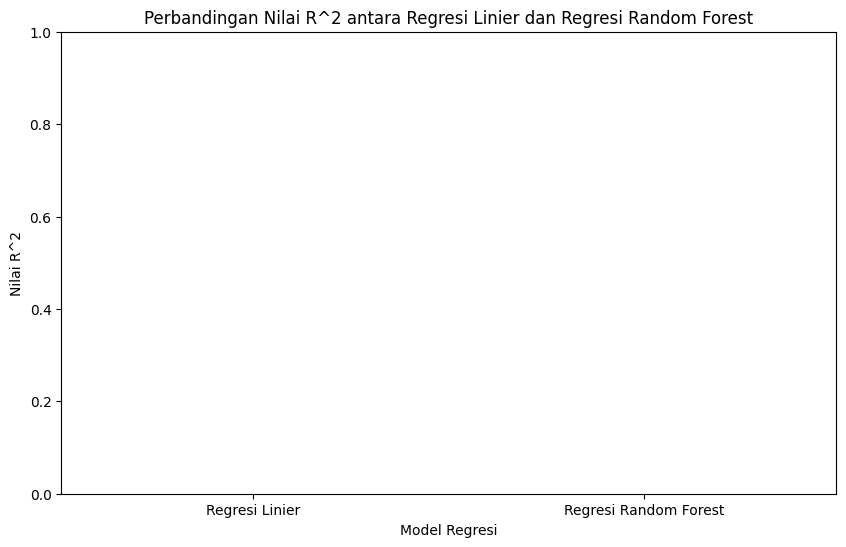

In [19]:
# Langkah 6: Melakukan pemodelan

# Regresi Linier
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Regresi Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Langkah 8: Visualisasi membandingkan nilai R^2 dari dua model regresi

# Menghitung nilai R^2 untuk Regresi Linier
r2_linear = model_linear.score(X_test, y_test)

# Menghitung nilai R^2 untuk Regresi Random Forest
r2_rf = model_rf.score(X_test, y_test)

# Membuat bar plot untuk membandingkan nilai R^2
plt.figure(figsize=(10, 6))
models = ['Regresi Linier', 'Regresi Random Forest']
r2_values = [r2_linear, r2_rf]

plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('Perbandingan Nilai R^2 antara Regresi Linier dan Regresi Random Forest')
plt.xlabel('Model Regresi')
plt.ylabel('Nilai R^2')
plt.ylim(0, 1)  # Batas sumbu y dari 0 hingga 1
plt.show()
